# 머신러닝 프로젝트 202447001 오민석
# 호텔 예약 취소 예측 모델

In [ ]:
import kagglehub
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
!apt-get -qq -y install fonts-nanum > /dev/null

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe)
plt.rcParams.update({'font.size': 12, 'font.family': 'NanumGothic'})


In [ ]:
df = pd.read_csv("/content/hotel_booking.csv")

In [ ]:
df.shape

(119390, 36)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## 데이터 전처리

개인정보 및 불필요한 컬럼 삭제

In [ ]:
df.drop(['name','email','phone-number','credit_card','reservation_status_date','reservation_status'],axis=1,inplace=True)

In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,A,0,No Deposit,9.0,0.0,0,Transient,151.20,0,2


In [ ]:
print(df.isnull().sum()[df.isnull().sum() > 0])

children         4
country        488
agent        16340
company     112593
dtype: int64


결측치 대체

In [ ]:
df['children'] = df['children'].fillna(0)

df['company'] = df['company'].fillna(0) # 0은 'no company'를 의미

df['agent'] = df['agent'].fillna(0)  # 0은 'no agent'를 의미

df['country'] = df['country'].fillna(df['country'].mode()[0])

In [ ]:
df.shape

(119390, 30)

## EDA

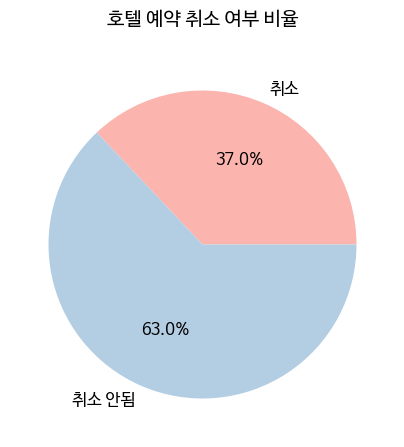

취소되지 않은 예약: 75166개
취소된 예약: 44224개


In [ ]:
# 'is_canceled'가 1인 값만 필터링
cancel_count = df['is_canceled'].value_counts()
cancelled = cancel_count[1]  # 취소된 예약의 수 (is_canceled == 1)

# 파이 차트 생성
plt.figure(figsize=(5, 5))
plt.pie([cancelled, cancel_count[0]],  # 취소된 예약과 취소되지 않은 예약
        labels=['취소', '취소 안됨'],
        autopct='%1.1f%%',
        colors=sns.color_palette('Pastel1'))
plt.title('호텔 예약 취소 여부 비율', pad=20, size=14)
plt.show()

print(f"취소되지 않은 예약: {cancel_count.get(0, 0)}개")
print(f"취소된 예약: {cancel_count.get(1, 0)}개")

가독성을 위해 market_segment 데이터 한국어로 맵핑

In [ ]:
market_segment_mapping = {
    'Online TA': '온라인 여행사',
    'Offline TA/TO': '오프라인 여행사',
    'Groups': '단체 예약',
    'Direct': '직접 예약',
    'Corporate': '기업 예약',
    'Complementary': '무료 제공',
    'Aviation': '항공사 예약',
    'Undefined': '미정의'
}

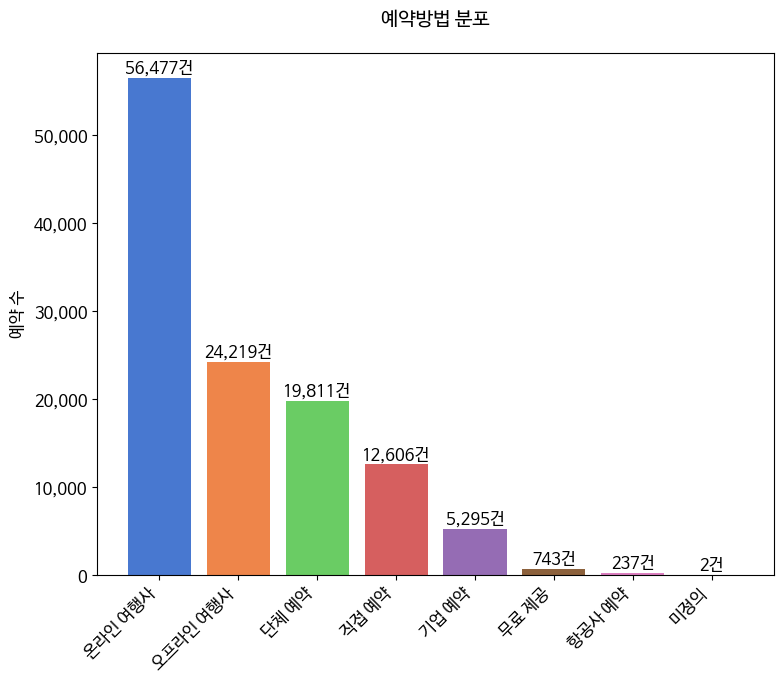

In [ ]:
# market_segment를 매핑하여 카운트를 계산합니다.
ms_count = df['market_segment'].map(market_segment_mapping).value_counts()

# 색상 팔레트 지정
colors = sns.color_palette('muted')

# 바 차트 생성
plt.figure(figsize=(8, 7))
bars = plt.bar(ms_count.index, ms_count.values, color=colors)

# 값 레이블 추가
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}건',
            ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title('예약방법 분포', pad=20, size=14)
plt.ylabel('예약 수', size=12)

# y축 천 단위 구분기호 추가
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()


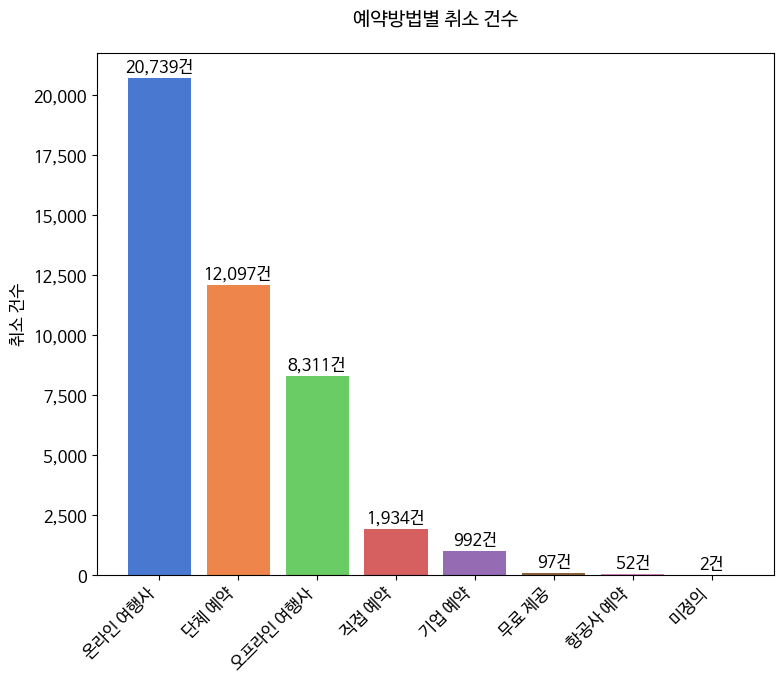

In [ ]:
df['market_segment_kr'] = df['market_segment'].map(market_segment_mapping)
cancellation_by_segment = pd.crosstab(df['market_segment_kr'], df['is_canceled'])
cancellation_count = cancellation_by_segment[1].sort_values(ascending=False)

# 바 차트 생성
plt.figure(figsize=(8, 7))
bars = plt.bar(cancellation_count.index, cancellation_count.values, color=colors)

# 값 레이블 추가 (간격 줄임)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,  # 간격을 50으로 조정
            f'{int(height):,}건',
            ha='center', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.title('예약방법별 취소 건수', pad=20, size=14)
plt.ylabel('취소 건수', size=12)

# y축 천 단위 구분기호 추가
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))

plt.tight_layout()
plt.show()


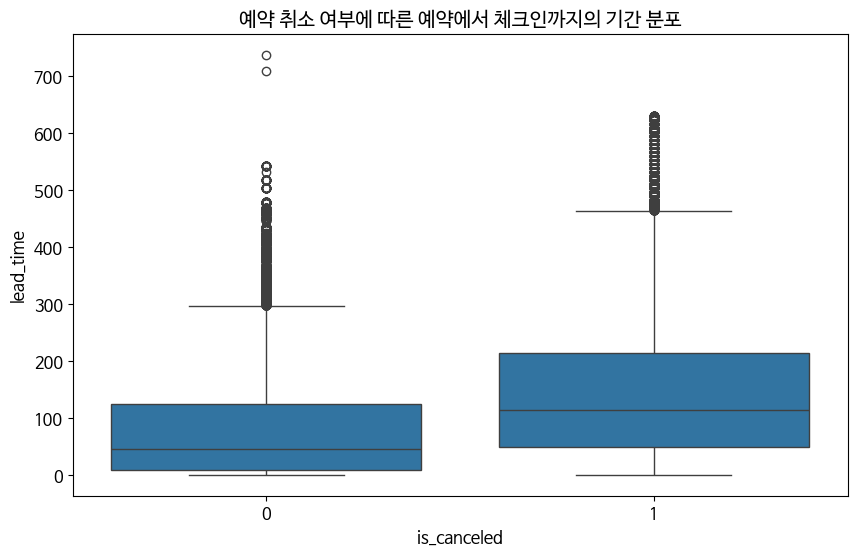

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title('예약 취소 여부에 따른 예약에서 체크인까지의 기간 분포')
plt.show()

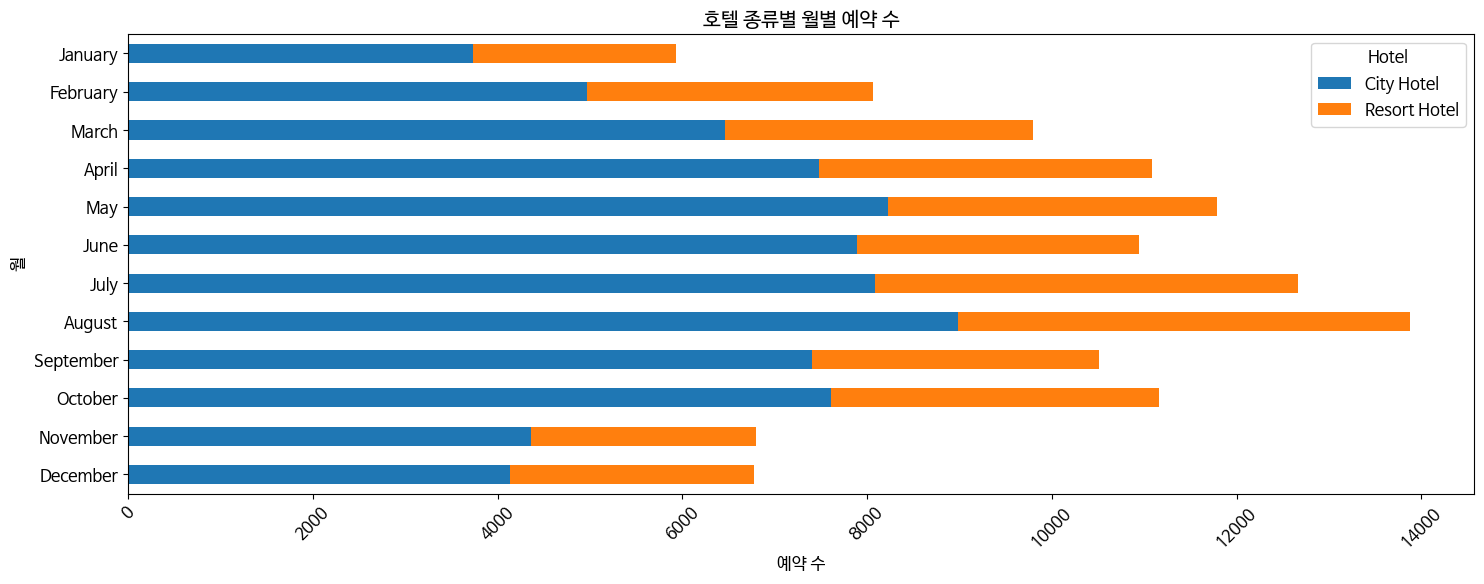

In [ ]:
# 'arrival_date_month'와 'hotel'을 기준으로 월별 예약 수를 구분하여 집계
monthly_bookings_by_hotel = df.groupby(['arrival_date_month', 'hotel']).size().unstack(fill_value=0)

# 월 순서를 맞추기 위해 'arrival_date_month'를 1월부터 12월까지 정렬
monthly_bookings_by_hotel = monthly_bookings_by_hotel.reindex([
    'December', 'November', 'October', 'September', 'August', 'July',
    'June', 'May', 'April', 'March', 'February', 'January'
])

# 시각화
monthly_bookings_by_hotel.plot(kind='barh', stacked=True, figsize=(15, 6), color=sns.color_palette("tab10"))
plt.title('호텔 종류별 월별 예약 수')
plt.xlabel('예약 수')
plt.ylabel('월')
plt.xticks(rotation=45)
plt.legend(title='Hotel', loc='upper right')
plt.tight_layout()
plt.show()

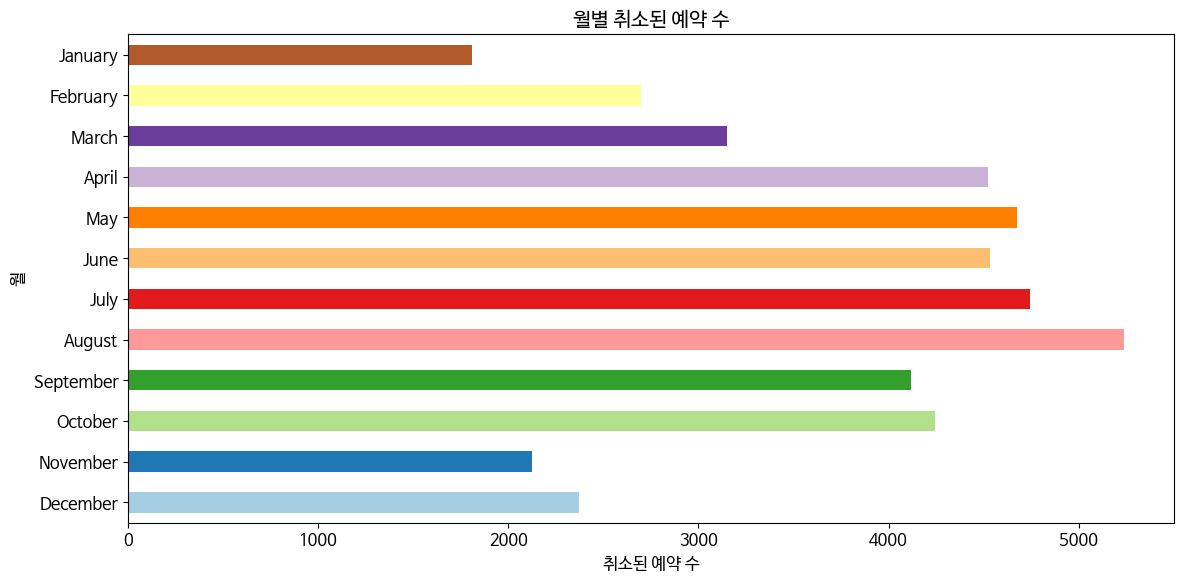

In [ ]:
# 'is_canceled'이 1인 데이터 필터링
canceled_bookings = df[df['is_canceled'] == 1]

# 'arrival_date_month' 기준으로 월별 취소된 예약 수 집계
monthly_canceled_bookings = canceled_bookings['arrival_date_month'].value_counts()

# 월 순서를 맞추기 위해 재정렬
monthly_canceled_bookings = monthly_canceled_bookings.reindex([
    'December', 'November', 'October', 'September', 'August', 'July',
    'June', 'May', 'April', 'March', 'February', 'January'
])

# 시각화
monthly_canceled_bookings.plot(kind='barh', figsize=(12, 6), color=sns.color_palette("Paired"))
plt.title('월별 취소된 예약 수')
plt.xlabel('취소된 예약 수')
plt.ylabel('월')
plt.tight_layout()
plt.show()


# 예측 모델 생성

In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler, LabelEncoder
from copy import deepcopy

# 범주형 변수 전처리
def preprocess_data(df):

    categorical_columns = ['hotel', 'arrival_date_month', 'meal', 'country',
                         'market_segment', 'distribution_channel', 'reserved_room_type',
                         'assigned_room_type', 'deposit_type', 'customer_type']

    # Label Encoding
    for column in categorical_columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

    # target 변수 분리
    y = df['is_canceled'].values
    X = df.drop('is_canceled', axis=1).values

    # numpy array를 torch tensor로 변환
    data = torch.from_numpy(np.column_stack((X, y))).float()

    return data

# 데이터 준비
data = preprocess_data(df)
x = data[:, :-1]
y = data[:, -1:]

# 데이터 분할 비율 설정
ratios = [0.6, 0.2, 0.2]
train_cnt = int(data.size(0) * ratios[0])
valid_cnt = int(data.size(0) * ratios[1])
test_cnt = data.size(0) - train_cnt - valid_cnt
cnts = [train_cnt, valid_cnt, test_cnt]

print("Train %d / Valid %d / Test %d " % (train_cnt, valid_cnt, test_cnt))

# 데이터 섞기
indices = torch.randperm(data.size(0))
x = torch.index_select(x, dim=0, index=indices)
y = torch.index_select(y, dim=0, index=indices)

# 데이터셋 분할
x = x.split(cnts, dim=0)
y = y.split(cnts, dim=0)

# 데이터 스케일링
scaler = StandardScaler()
scaler.fit(x[0].numpy())
x = [
    torch.from_numpy(scaler.transform(x[0].numpy())).float(),
    torch.from_numpy(scaler.transform(x[1].numpy())).float(),
    torch.from_numpy(scaler.transform(x[2].numpy())).float()
]

# 입출력 차원 확인
input_size = x[0].size(-1)
output_size = y[0].size(-1)
print(f"Input size: {input_size}")
print(f"Output size: {output_size}")


Train 71634 / Valid 23878 / Test 23878 
Input size: 29
Output size: 1


## 기본 모델

batch size 128

Epoch 10: train loss=3.0558e-01 valid_loss=3.2075e-01 lowest_loss=3.1992e-01
Epoch 20: train loss=2.8621e-01 valid_loss=3.1616e-01 lowest_loss=3.0916e-01
Epoch 30: train loss=2.7583e-01 valid_loss=3.0521e-01 lowest_loss=3.0744e-01
Epoch 40: train loss=2.6865e-01 valid_loss=3.0257e-01 lowest_loss=3.0267e-01
Epoch 50: train loss=2.6083e-01 valid_loss=3.0254e-01 lowest_loss=3.0209e-01
Epoch 60: train loss=2.5538e-01 valid_loss=3.1110e-01 lowest_loss=3.0209e-01
Epoch 70: train loss=2.5092e-01 valid_loss=3.1056e-01 lowest_loss=3.0209e-01
Epoch 80: train loss=2.4647e-01 valid_loss=3.1362e-01 lowest_loss=3.0209e-01
Epoch 90: train loss=2.4316e-01 valid_loss=3.1933e-01 lowest_loss=3.0209e-01
Epoch 100: train loss=2.3969e-01 valid_loss=3.1758e-01 lowest_loss=3.0209e-01
Epoch 110: train loss=2.3758e-01 valid_loss=3.2417e-01 lowest_loss=3.0209e-01
Epoch 120: train loss=2.3506e-01 valid_loss=3.3291e-01 lowest_loss=3.0209e-01
Epoch 130: train loss=2.3304e-01 valid_loss=3.3342e-01 lowest_loss=3.0209

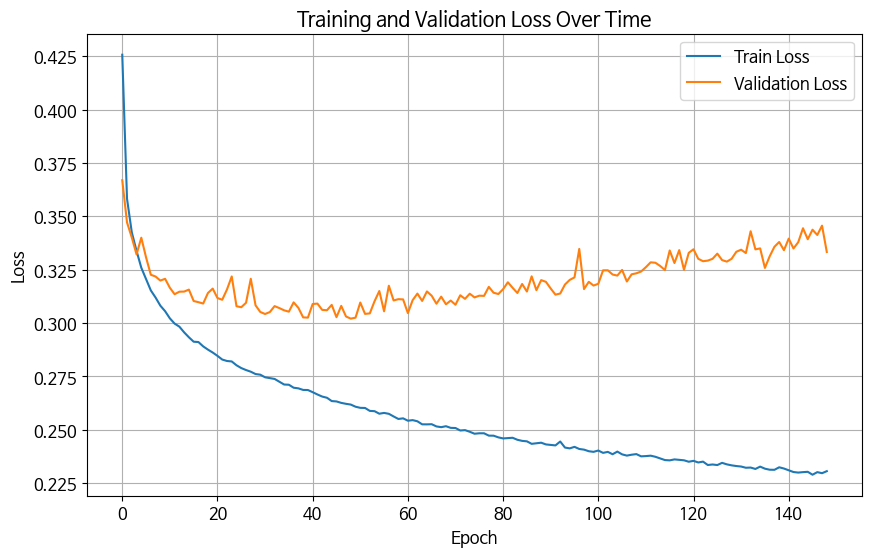

In [ ]:
# 모델 정의
model = nn.Sequential(
    nn.Linear(input_size, 64),
    nn.LeakyReLU(),
    nn.Linear(64, 32),
    nn.LeakyReLU(),
    nn.Linear(32, 16),
    nn.LeakyReLU(),
    nn.Linear(16, 8),
    nn.LeakyReLU(),
    nn.Linear(8, 1),
    nn.Sigmoid(),
)

# 옵티마이저 설정
optimizer = optim.Adam(model.parameters())

# 학습 파라미터 설정
n_epochs = 1000
batch_size = 128
print_interval = 10
early_stop = 100

# 학습 기록을 위한 변수들
lowest_loss = np.inf
best_model = None
lowest_epoch = np.inf
train_history, valid_history = [], []

# 학습 루프
for i in range(n_epochs):
    # 학습 데이터 섞기
    indices = torch.randperm(x[0].size(0))
    x_ = torch.index_select(x[0], dim=0, index=indices)
    y_ = torch.index_select(y[0], dim=0, index=indices)

    # 배치 생성
    x_ = x_.split(batch_size, dim=0)
    y_ = y_.split(batch_size, dim=0)

    # 학습
    train_loss = 0
    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += float(loss)

    train_loss = train_loss / len(x_)

    # 검증
    with torch.no_grad():
        x_ = x[1].split(batch_size, dim=0)
        y_ = y[1].split(batch_size, dim=0)

        valid_loss = 0
        y_hat = []

        for x_i, y_i in zip(x_, y_):
            y_hat_i = model(x_i)
            loss = F.binary_cross_entropy(y_hat_i, y_i)

            valid_loss += float(loss)
            y_hat += [y_hat_i]

        valid_loss = valid_loss / len(x_)

    train_history += [train_loss]
    valid_history += [valid_loss]

    if (i + 1) % print_interval == 0:
        print('Epoch %d: train loss=%.4e valid_loss=%.4e lowest_loss=%.4e' % (
            i + 1,
            train_loss,
            valid_loss,
            lowest_loss,
        ))

    # 모델 저장 및 Early Stopping
    if valid_loss <= lowest_loss:
        lowest_loss = valid_loss
        lowest_epoch = i
        best_model = deepcopy(model.state_dict())
    else:
        if early_stop > 0 and lowest_epoch + early_stop < i + 1:
            print("There is no improvement during last %d epochs." % early_stop)
            break

print("The best validation loss from epoch %d: %.4e" % (lowest_epoch + 1, lowest_loss))
model.load_state_dict(best_model)

# 테스트 데이터로 평가 및 정확도 계산
with torch.no_grad():
    x_ = x[2].split(batch_size, dim=0)
    y_ = y[2].split(batch_size, dim=0)

    test_loss = 0
    correct = 0
    total = 0

    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        # 정확도 계산
        predicted = (y_hat_i > 0.5).float()
        total += y_i.size(0)
        correct += (predicted == y_i).sum().item()

        test_loss += float(loss)

    test_loss = test_loss / len(x_)
    accuracy = 100 * correct / total

print(f"Test loss: {test_loss:.4e}")
print(f"Test accuracy: {accuracy:.2f}%")

plt.figure(figsize=(10, 6))
plt.plot(train_history, label='Train Loss')
plt.plot(valid_history, label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## DropOut 적용 모델

batch size 128

Epoch 10: train loss=3.1556e-01 valid_loss=3.2080e-01 lowest_loss=3.2589e-01
Epoch 20: train loss=2.9567e-01 valid_loss=3.1520e-01 lowest_loss=3.1236e-01
Epoch 30: train loss=2.8754e-01 valid_loss=3.1328e-01 lowest_loss=3.0842e-01
Epoch 40: train loss=2.8078e-01 valid_loss=3.0707e-01 lowest_loss=3.0842e-01
Epoch 50: train loss=2.7697e-01 valid_loss=3.0870e-01 lowest_loss=3.0707e-01
Epoch 60: train loss=2.7206e-01 valid_loss=3.1120e-01 lowest_loss=3.0707e-01
Epoch 70: train loss=2.7103e-01 valid_loss=3.1034e-01 lowest_loss=3.0707e-01
Epoch 80: train loss=2.6807e-01 valid_loss=3.1170e-01 lowest_loss=3.0659e-01
Epoch 90: train loss=2.6630e-01 valid_loss=3.1046e-01 lowest_loss=3.0659e-01
Epoch 100: train loss=2.6649e-01 valid_loss=3.1297e-01 lowest_loss=3.0659e-01
Epoch 110: train loss=2.6238e-01 valid_loss=3.2019e-01 lowest_loss=3.0659e-01
Epoch 120: train loss=2.6160e-01 valid_loss=3.1231e-01 lowest_loss=3.0659e-01
Epoch 130: train loss=2.5981e-01 valid_loss=3.1709e-01 lowest_loss=3.0659

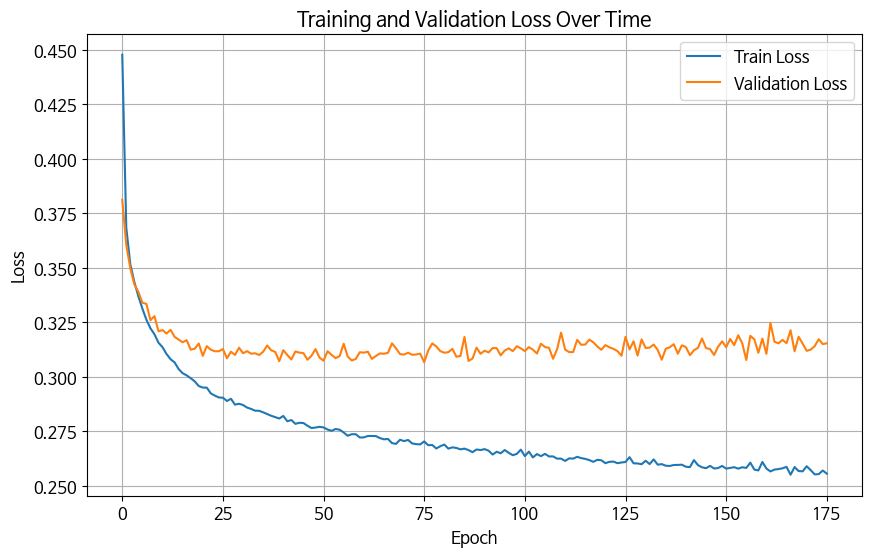

In [ ]:
# 모델 정의
p = 0.03
model = nn.Sequential(
    nn.Linear(input_size,64),
    nn.LeakyReLU(),
    nn.Dropout(p),
    nn.Linear(64, 32),
    nn.LeakyReLU(),
    nn.Dropout(p),
    nn.Linear(32, 16),
    nn.LeakyReLU(),
    nn.Dropout(p),
    nn.Linear(16, 8),
    nn.LeakyReLU(),
    nn.Dropout(p),
    nn.Linear(8, 1),
    nn.Sigmoid(),
)

# 옵티마이저 설정
optimizer = optim.Adam(model.parameters())

# 학습 파라미터 설정
n_epochs = 1000
batch_size = 128
print_interval = 10
early_stop = 100

# 학습 기록을 위한 변수들
lowest_loss = np.inf
best_model = None
lowest_epoch = np.inf
train_history, valid_history = [], []

# 학습 루프
for i in range(n_epochs):
    # 학습 데이터 섞기
    indices = torch.randperm(x[0].size(0))
    x_ = torch.index_select(x[0], dim=0, index=indices)
    y_ = torch.index_select(y[0], dim=0, index=indices)

    # 배치 생성
    x_ = x_.split(batch_size, dim=0)
    y_ = y_.split(batch_size, dim=0)

    # 학습
    train_loss = 0
    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += float(loss)

    train_loss = train_loss / len(x_)

    # 검증
    with torch.no_grad():
        x_ = x[1].split(batch_size, dim=0)
        y_ = y[1].split(batch_size, dim=0)

        valid_loss = 0
        y_hat = []

        for x_i, y_i in zip(x_, y_):
            y_hat_i = model(x_i)
            loss = F.binary_cross_entropy(y_hat_i, y_i)

            valid_loss += float(loss)
            y_hat += [y_hat_i]

        valid_loss = valid_loss / len(x_)

    train_history += [train_loss]
    valid_history += [valid_loss]

    if (i + 1) % print_interval == 0:
        print('Epoch %d: train loss=%.4e valid_loss=%.4e lowest_loss=%.4e' % (
            i + 1,
            train_loss,
            valid_loss,
            lowest_loss,
        ))

    # 모델 저장 및 Early Stopping
    if valid_loss <= lowest_loss:
        lowest_loss = valid_loss
        lowest_epoch = i
        best_model = deepcopy(model.state_dict())
    else:
        if early_stop > 0 and lowest_epoch + early_stop < i + 1:
            print("There is no improvement during last %d epochs." % early_stop)
            break

print("The best validation loss from epoch %d: %.4e" % (lowest_epoch + 1, lowest_loss))
model.load_state_dict(best_model)

# 테스트 데이터로 평가 및 정확도 계산
with torch.no_grad():
    x_ = x[2].split(batch_size, dim=0)
    y_ = y[2].split(batch_size, dim=0)

    test_loss = 0
    correct = 0
    total = 0

    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        # 정확도 계산
        predicted = (y_hat_i > 0.5).float()
        total += y_i.size(0)
        correct += (predicted == y_i).sum().item()

        test_loss += float(loss)

    test_loss = test_loss / len(x_)
    accuracy = 100 * correct / total

print(f"Test loss: {test_loss:.4e}")
print(f"Test accuracy: {accuracy:.2f}%")

plt.figure(figsize=(10, 6))
plt.plot(train_history, label='Train Loss')
plt.plot(valid_history, label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Batch Normalization 적용 모델

batch size 128

Epoch 10: train loss=3.0131e-01 valid_loss=3.0988e-01 lowest_loss=3.0961e-01
Epoch 20: train loss=2.8588e-01 valid_loss=3.0121e-01 lowest_loss=3.0072e-01
Epoch 30: train loss=2.7871e-01 valid_loss=3.0268e-01 lowest_loss=2.9880e-01
Epoch 40: train loss=2.7164e-01 valid_loss=2.9943e-01 lowest_loss=2.9788e-01
Epoch 50: train loss=2.6752e-01 valid_loss=2.9846e-01 lowest_loss=2.9757e-01
Epoch 60: train loss=2.6456e-01 valid_loss=3.0026e-01 lowest_loss=2.9757e-01
Epoch 70: train loss=2.5903e-01 valid_loss=3.0149e-01 lowest_loss=2.9663e-01
Epoch 80: train loss=2.5632e-01 valid_loss=3.0303e-01 lowest_loss=2.9663e-01
Epoch 90: train loss=2.5592e-01 valid_loss=3.0167e-01 lowest_loss=2.9663e-01
Epoch 100: train loss=2.5467e-01 valid_loss=3.0227e-01 lowest_loss=2.9663e-01
Epoch 110: train loss=2.5306e-01 valid_loss=3.0393e-01 lowest_loss=2.9663e-01
Epoch 120: train loss=2.5144e-01 valid_loss=3.0081e-01 lowest_loss=2.9663e-01
Epoch 130: train loss=2.4987e-01 valid_loss=3.0231e-01 lowest_loss=2.9663

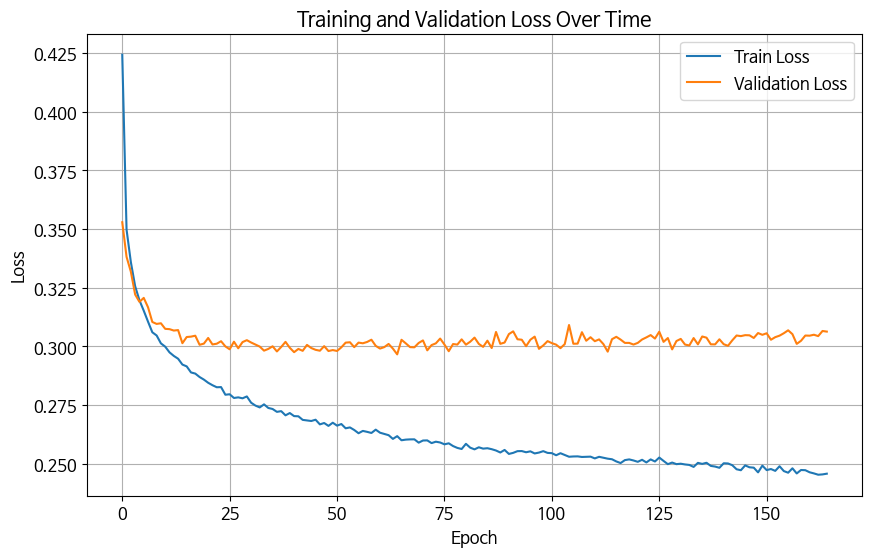

In [ ]:
# BatchNormalization만 적용한 모델
model = nn.Sequential(
    nn.Linear(input_size, 64),
    nn.LeakyReLU(),
    nn.BatchNorm1d(64),

    nn.Linear(64, 32),
    nn.LeakyReLU(),
    nn.BatchNorm1d(32),

    nn.Linear(32, 16),
    nn.LeakyReLU(),
    nn.BatchNorm1d(16),

    nn.Linear(16, 8),
    nn.LeakyReLU(),
    nn.BatchNorm1d(8),

    nn.Linear(8, 1),
    nn.Sigmoid(),
)

# 옵티마이저 설정
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 파라미터
n_epochs = 1000
batch_size = 128
print_interval = 10
early_stop = 100

# 학습 기록을 위한 변수들
lowest_loss = np.inf
best_model = None
lowest_epoch = np.inf
train_history, valid_history = [], []

# 학습 루프
for i in range(n_epochs):
    indices = torch.randperm(x[0].size(0))
    x_ = torch.index_select(x[0], dim=0, index=indices)
    y_ = torch.index_select(y[0], dim=0, index=indices)

    x_ = x_.split(batch_size, dim=0)
    y_ = y_.split(batch_size, dim=0)

    # 학습 모드
    model.train()
    train_loss = 0
    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += float(loss)

    train_loss = train_loss / len(x_)

    # 평가 모드
    model.eval()
    with torch.no_grad():
        x_ = x[1].split(batch_size, dim=0)
        y_ = y[1].split(batch_size, dim=0)

        valid_loss = 0

        for x_i, y_i in zip(x_, y_):
            y_hat_i = model(x_i)
            loss = F.binary_cross_entropy(y_hat_i, y_i)
            valid_loss += float(loss)

        valid_loss = valid_loss / len(x_)

    train_history += [train_loss]
    valid_history += [valid_loss]

    if (i + 1) % print_interval == 0:
        print('Epoch %d: train loss=%.4e valid_loss=%.4e lowest_loss=%.4e' % (
            i + 1,
            train_loss,
            valid_loss,
            lowest_loss,
        ))

    if valid_loss <= lowest_loss:
        lowest_loss = valid_loss
        lowest_epoch = i
        best_model = deepcopy(model.state_dict())
    else:
        if early_stop > 0 and lowest_epoch + early_stop < i + 1:
            print("There is no improvement during last %d epochs." % early_stop)
            break

print("The best validation loss from epoch %d: %.4e" % (lowest_epoch + 1, lowest_loss))
model.load_state_dict(best_model)

# 테스트 데이터로 평가
model.eval()
with torch.no_grad():
    x_ = x[2].split(batch_size, dim=0)
    y_ = y[2].split(batch_size, dim=0)

    test_loss = 0
    correct = 0
    total = 0

    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        predicted = (y_hat_i > 0.5).float()
        total += y_i.size(0)
        correct += (predicted == y_i).sum().item()

        test_loss += float(loss)

    test_loss = test_loss / len(x_)
    accuracy = 100 * correct / total

print(f"Test loss: {test_loss:.4e}")
print(f"Test accuracy: {accuracy:.2f}%")

# 손실 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(train_history, label='Train Loss')
plt.plot(valid_history, label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## batch size 64 (최고 성능)

Epoch 10: train loss=3.0974e-01 valid_loss=3.1216e-01 lowest_loss=3.1045e-01
Epoch 20: train loss=2.9392e-01 valid_loss=2.9947e-01 lowest_loss=2.9935e-01
Epoch 30: train loss=2.8591e-01 valid_loss=2.9338e-01 lowest_loss=2.9552e-01
Epoch 40: train loss=2.7952e-01 valid_loss=2.9398e-01 lowest_loss=2.9085e-01
Epoch 50: train loss=2.7573e-01 valid_loss=2.9369e-01 lowest_loss=2.9081e-01
Epoch 60: train loss=2.7231e-01 valid_loss=2.9219e-01 lowest_loss=2.9008e-01
Epoch 70: train loss=2.7082e-01 valid_loss=2.9028e-01 lowest_loss=2.8941e-01
Epoch 80: train loss=2.6726e-01 valid_loss=2.8995e-01 lowest_loss=2.8862e-01
Epoch 90: train loss=2.6639e-01 valid_loss=2.9155e-01 lowest_loss=2.8812e-01
Epoch 100: train loss=2.6492e-01 valid_loss=2.8931e-01 lowest_loss=2.8792e-01
Epoch 110: train loss=2.6357e-01 valid_loss=2.8945e-01 lowest_loss=2.8792e-01
Epoch 120: train loss=2.6322e-01 valid_loss=2.8903e-01 lowest_loss=2.8782e-01
Epoch 130: train loss=2.6047e-01 valid_loss=2.9032e-01 lowest_loss=2.8782

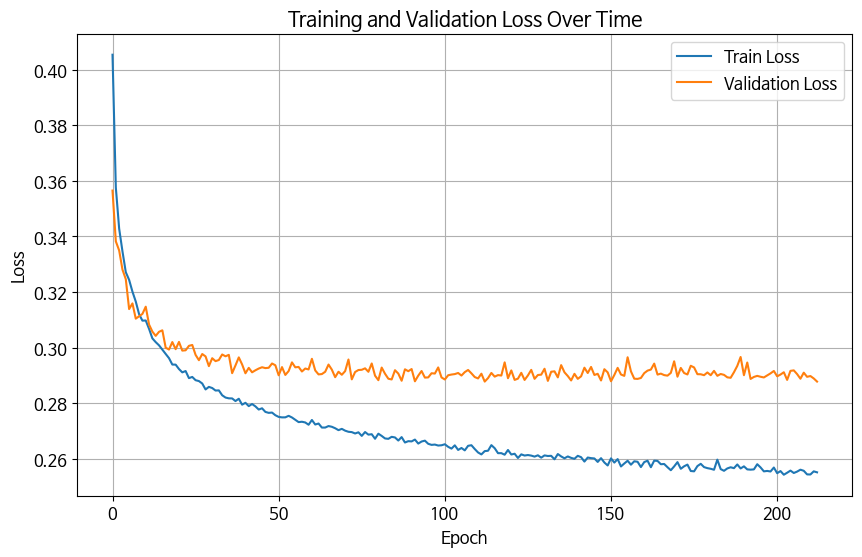

In [ ]:
# BatchNormalization만 적용한 모델
model = nn.Sequential(
    nn.Linear(input_size, 64),
    nn.LeakyReLU(),
    nn.BatchNorm1d(64),

    nn.Linear(64, 32),
    nn.LeakyReLU(),
    nn.BatchNorm1d(32),

    nn.Linear(32, 16),
    nn.LeakyReLU(),
    nn.BatchNorm1d(16),

    nn.Linear(16, 8),
    nn.LeakyReLU(),
    nn.BatchNorm1d(8),

    nn.Linear(8, 1),
    nn.Sigmoid(),
)

# 옵티마이저 설정
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 파라미터
n_epochs = 1000
batch_size = 64
print_interval = 10
early_stop = 100

# 학습 기록을 위한 변수들
lowest_loss = np.inf
best_model = None
lowest_epoch = np.inf
train_history, valid_history = [], []

# 학습 루프
for i in range(n_epochs):
    indices = torch.randperm(x[0].size(0))
    x_ = torch.index_select(x[0], dim=0, index=indices)
    y_ = torch.index_select(y[0], dim=0, index=indices)

    x_ = x_.split(batch_size, dim=0)
    y_ = y_.split(batch_size, dim=0)

    # 학습 모드
    model.train()
    train_loss = 0
    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += float(loss)

    train_loss = train_loss / len(x_)

    # 평가 모드
    model.eval()
    with torch.no_grad():
        x_ = x[1].split(batch_size, dim=0)
        y_ = y[1].split(batch_size, dim=0)

        valid_loss = 0

        for x_i, y_i in zip(x_, y_):
            y_hat_i = model(x_i)
            loss = F.binary_cross_entropy(y_hat_i, y_i)
            valid_loss += float(loss)

        valid_loss = valid_loss / len(x_)

    train_history += [train_loss]
    valid_history += [valid_loss]

    if (i + 1) % print_interval == 0:
        print('Epoch %d: train loss=%.4e valid_loss=%.4e lowest_loss=%.4e' % (
            i + 1,
            train_loss,
            valid_loss,
            lowest_loss,
        ))

    if valid_loss <= lowest_loss:
        lowest_loss = valid_loss
        lowest_epoch = i
        best_model = deepcopy(model.state_dict())
    else:
        if early_stop > 0 and lowest_epoch + early_stop < i + 1:
            print("There is no improvement during last %d epochs." % early_stop)
            break

print("The best validation loss from epoch %d: %.4e" % (lowest_epoch + 1, lowest_loss))
model.load_state_dict(best_model)

# 테스트 데이터로 평가
model.eval()
with torch.no_grad():
    x_ = x[2].split(batch_size, dim=0)
    y_ = y[2].split(batch_size, dim=0)

    test_loss = 0
    correct = 0
    total = 0

    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        predicted = (y_hat_i > 0.5).float()
        total += y_i.size(0)
        correct += (predicted == y_i).sum().item()

        test_loss += float(loss)

    test_loss = test_loss / len(x_)
    accuracy = 100 * correct / total

print(f"Test loss: {test_loss:.4e}")
print(f"Test accuracy: {accuracy:.2f}%")

# 손실 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(train_history, label='Train Loss')
plt.plot(valid_history, label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

batch size 256

Epoch 10: train loss=3.0077e-01 valid_loss=3.1245e-01 lowest_loss=3.1537e-01
Epoch 20: train loss=2.8189e-01 valid_loss=3.0809e-01 lowest_loss=3.0654e-01
Epoch 30: train loss=2.7151e-01 valid_loss=3.0338e-01 lowest_loss=3.0227e-01
Epoch 40: train loss=2.6557e-01 valid_loss=3.0308e-01 lowest_loss=3.0061e-01
Epoch 50: train loss=2.6057e-01 valid_loss=3.0265e-01 lowest_loss=2.9963e-01
Epoch 60: train loss=2.5824e-01 valid_loss=3.0312e-01 lowest_loss=2.9963e-01
Epoch 70: train loss=2.5458e-01 valid_loss=3.0368e-01 lowest_loss=2.9963e-01
Epoch 80: train loss=2.5156e-01 valid_loss=3.0387e-01 lowest_loss=2.9963e-01
Epoch 90: train loss=2.4838e-01 valid_loss=3.0408e-01 lowest_loss=2.9963e-01
Epoch 100: train loss=2.4684e-01 valid_loss=3.0740e-01 lowest_loss=2.9963e-01
Epoch 110: train loss=2.4521e-01 valid_loss=3.0659e-01 lowest_loss=2.9963e-01
Epoch 120: train loss=2.4379e-01 valid_loss=3.1027e-01 lowest_loss=2.9963e-01
Epoch 130: train loss=2.4210e-01 valid_loss=3.1223e-01 lowest_loss=2.9963

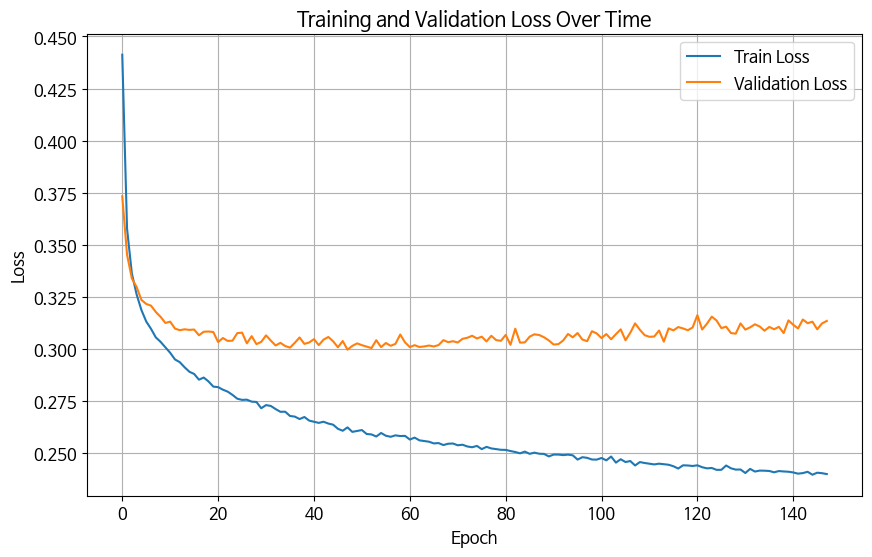

In [ ]:
# BatchNormalization만 적용한 모델
model = nn.Sequential(
    nn.Linear(input_size, 64),
    nn.LeakyReLU(),
    nn.BatchNorm1d(64),

    nn.Linear(64, 32),
    nn.LeakyReLU(),
    nn.BatchNorm1d(32),

    nn.Linear(32, 16),
    nn.LeakyReLU(),
    nn.BatchNorm1d(16),

    nn.Linear(16, 8),
    nn.LeakyReLU(),
    nn.BatchNorm1d(8),

    nn.Linear(8, 1),
    nn.Sigmoid(),
)

# 옵티마이저 설정
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 파라미터
n_epochs = 1000
batch_size = 256
print_interval = 10
early_stop = 100

# 학습 기록을 위한 변수들
lowest_loss = np.inf
best_model = None
lowest_epoch = np.inf
train_history, valid_history = [], []

# 학습 루프
for i in range(n_epochs):
    indices = torch.randperm(x[0].size(0))
    x_ = torch.index_select(x[0], dim=0, index=indices)
    y_ = torch.index_select(y[0], dim=0, index=indices)

    x_ = x_.split(batch_size, dim=0)
    y_ = y_.split(batch_size, dim=0)

    # 학습 모드
    model.train()
    train_loss = 0
    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += float(loss)

    train_loss = train_loss / len(x_)

    # 평가 모드
    model.eval()
    with torch.no_grad():
        x_ = x[1].split(batch_size, dim=0)
        y_ = y[1].split(batch_size, dim=0)

        valid_loss = 0

        for x_i, y_i in zip(x_, y_):
            y_hat_i = model(x_i)
            loss = F.binary_cross_entropy(y_hat_i, y_i)
            valid_loss += float(loss)

        valid_loss = valid_loss / len(x_)

    train_history += [train_loss]
    valid_history += [valid_loss]

    if (i + 1) % print_interval == 0:
        print('Epoch %d: train loss=%.4e valid_loss=%.4e lowest_loss=%.4e' % (
            i + 1,
            train_loss,
            valid_loss,
            lowest_loss,
        ))

    if valid_loss <= lowest_loss:
        lowest_loss = valid_loss
        lowest_epoch = i
        best_model = deepcopy(model.state_dict())
    else:
        if early_stop > 0 and lowest_epoch + early_stop < i + 1:
            print("There is no improvement during last %d epochs." % early_stop)
            break

print("The best validation loss from epoch %d: %.4e" % (lowest_epoch + 1, lowest_loss))
model.load_state_dict(best_model)

# 테스트 데이터로 평가
model.eval()
with torch.no_grad():
    x_ = x[2].split(batch_size, dim=0)
    y_ = y[2].split(batch_size, dim=0)

    test_loss = 0
    correct = 0
    total = 0

    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        predicted = (y_hat_i > 0.5).float()
        total += y_i.size(0)
        correct += (predicted == y_i).sum().item()

        test_loss += float(loss)

    test_loss = test_loss / len(x_)
    accuracy = 100 * correct / total

print(f"Test loss: {test_loss:.4e}")
print(f"Test accuracy: {accuracy:.2f}%")

# 손실 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(train_history, label='Train Loss')
plt.plot(valid_history, label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Batch Normalization, DropOut 둘다 적용

---



Epoch 10: train loss=3.7553e-01 valid_loss=3.7656e-01 lowest_loss=3.7585e-01
Epoch 20: train loss=3.6112e-01 valid_loss=3.6399e-01 lowest_loss=3.6460e-01
Epoch 30: train loss=3.5847e-01 valid_loss=3.5632e-01 lowest_loss=3.5840e-01
Epoch 40: train loss=3.5184e-01 valid_loss=3.6361e-01 lowest_loss=3.5305e-01
Epoch 50: train loss=3.5046e-01 valid_loss=3.5547e-01 lowest_loss=3.5305e-01
Epoch 60: train loss=3.4773e-01 valid_loss=3.5653e-01 lowest_loss=3.5189e-01
Epoch 70: train loss=3.5150e-01 valid_loss=3.5123e-01 lowest_loss=3.5095e-01
Epoch 80: train loss=3.4833e-01 valid_loss=3.5039e-01 lowest_loss=3.4635e-01
Epoch 90: train loss=3.4402e-01 valid_loss=3.4962e-01 lowest_loss=3.4635e-01
Epoch 100: train loss=3.4491e-01 valid_loss=3.5032e-01 lowest_loss=3.4635e-01
Epoch 110: train loss=3.4624e-01 valid_loss=3.5054e-01 lowest_loss=3.4628e-01
Epoch 120: train loss=3.4465e-01 valid_loss=3.5231e-01 lowest_loss=3.4628e-01
Epoch 130: train loss=3.4578e-01 valid_loss=3.5286e-01 lowest_loss=3.4628

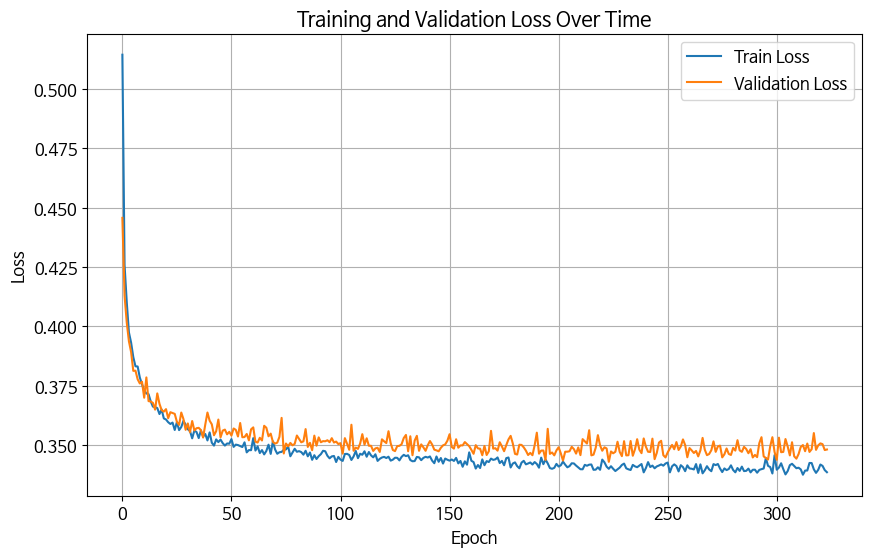

In [ ]:
# Batch Normalization, DropOut 둘다 적용

model = nn.Sequential(
    nn.Linear(input_size, 64),
    nn.BatchNorm1d(64),
    nn.LeakyReLU(),
    nn.Dropout(0.3),

    nn.Linear(64, 32),
    nn.BatchNorm1d(32),
    nn.LeakyReLU(),
    nn.Dropout(0.3),

    nn.Linear(32, 16),
    nn.BatchNorm1d(16),
    nn.LeakyReLU(),
    nn.Dropout(0.3),

    nn.Linear(16, 8),
    nn.BatchNorm1d(8),
    nn.LeakyReLU(),
    nn.Dropout(0.3),

    nn.Linear(8, 1),
    nn.Sigmoid(),
)

# 옵티마이저 설정
optimizer = optim.Adam(model.parameters())

# 학습 파라미터 설정
n_epochs = 1000
batch_size = 128
print_interval = 10
early_stop = 100

# 학습 기록을 위한 변수들
lowest_loss = np.inf
best_model = None
lowest_epoch = np.inf
train_history, valid_history = [], []

# 학습 루프
for i in range(n_epochs):
    # 학습 데이터 섞기
    indices = torch.randperm(x[0].size(0))
    x_ = torch.index_select(x[0], dim=0, index=indices)
    y_ = torch.index_select(y[0], dim=0, index=indices)

    # 배치 생성
    x_ = x_.split(batch_size, dim=0)
    y_ = y_.split(batch_size, dim=0)

    # 학습
    train_loss = 0
    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += float(loss)

    train_loss = train_loss / len(x_)

    # 검증
    with torch.no_grad():
        x_ = x[1].split(batch_size, dim=0)
        y_ = y[1].split(batch_size, dim=0)

        valid_loss = 0
        y_hat = []

        for x_i, y_i in zip(x_, y_):
            y_hat_i = model(x_i)
            loss = F.binary_cross_entropy(y_hat_i, y_i)

            valid_loss += float(loss)
            y_hat += [y_hat_i]

        valid_loss = valid_loss / len(x_)

    train_history += [train_loss]
    valid_history += [valid_loss]

    if (i + 1) % print_interval == 0:
        print('Epoch %d: train loss=%.4e valid_loss=%.4e lowest_loss=%.4e' % (
            i + 1,
            train_loss,
            valid_loss,
            lowest_loss,
        ))

    # 모델 저장 및 Early Stopping
    if valid_loss <= lowest_loss:
        lowest_loss = valid_loss
        lowest_epoch = i
        best_model = deepcopy(model.state_dict())
    else:
        if early_stop > 0 and lowest_epoch + early_stop < i + 1:
            print("There is no improvement during last %d epochs." % early_stop)
            break

print("The best validation loss from epoch %d: %.4e" % (lowest_epoch + 1, lowest_loss))
model.load_state_dict(best_model)

# 테스트 데이터로 평가 및 정확도 계산
with torch.no_grad():
    x_ = x[2].split(batch_size, dim=0)
    y_ = y[2].split(batch_size, dim=0)

    test_loss = 0
    correct = 0
    total = 0

    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        # 정확도 계산
        predicted = (y_hat_i > 0.5).float()
        total += y_i.size(0)
        correct += (predicted == y_i).sum().item()

        test_loss += float(loss)

    test_loss = test_loss / len(x_)
    accuracy = 100 * correct / total

print(f"Test loss: {test_loss:.4e}")
print(f"Test accuracy: {accuracy:.2f}%")

plt.figure(figsize=(10, 6))
plt.plot(train_history, label='Train Loss')
plt.plot(valid_history, label='Validation Loss')
plt.title('Training and Validation Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# 모델 성능 평가

Epoch 10: train loss=3.0810e-01 valid_loss=3.0715e-01 lowest_loss=3.1296e-01
Epoch 20: train loss=2.9300e-01 valid_loss=3.0024e-01 lowest_loss=3.0033e-01
Epoch 30: train loss=2.8460e-01 valid_loss=3.0251e-01 lowest_loss=2.9556e-01
Epoch 40: train loss=2.7940e-01 valid_loss=3.0073e-01 lowest_loss=2.9556e-01
Epoch 50: train loss=2.7563e-01 valid_loss=2.9729e-01 lowest_loss=2.9444e-01
Epoch 60: train loss=2.7304e-01 valid_loss=2.9777e-01 lowest_loss=2.9353e-01
Epoch 70: train loss=2.6978e-01 valid_loss=2.9581e-01 lowest_loss=2.9353e-01
Epoch 80: train loss=2.6802e-01 valid_loss=2.9666e-01 lowest_loss=2.9353e-01
Epoch 90: train loss=2.6649e-01 valid_loss=2.9546e-01 lowest_loss=2.9353e-01
Epoch 100: train loss=2.6388e-01 valid_loss=2.9830e-01 lowest_loss=2.9353e-01
Epoch 110: train loss=2.6277e-01 valid_loss=2.9814e-01 lowest_loss=2.9353e-01
Epoch 120: train loss=2.6091e-01 valid_loss=2.9832e-01 lowest_loss=2.9353e-01
Epoch 130: train loss=2.6112e-01 valid_loss=2.9842e-01 lowest_loss=2.9353

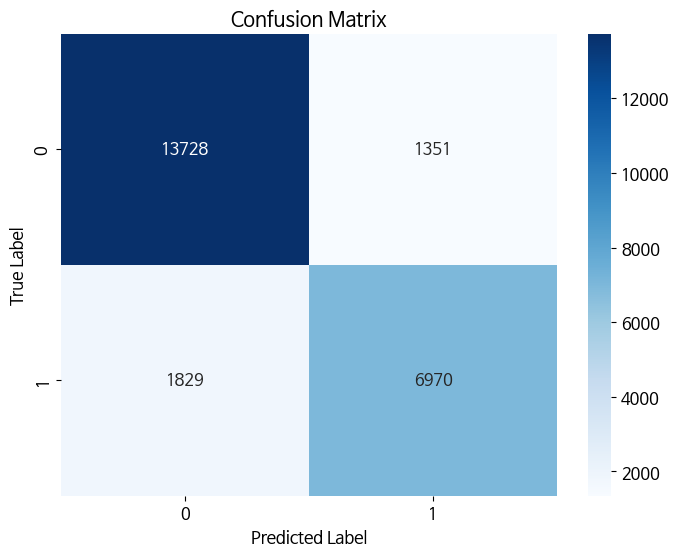


Classification Report:
              precision    recall  f1-score   support

Not Canceled       0.88      0.91      0.90     15079
    Canceled       0.84      0.79      0.81      8799

    accuracy                           0.87     23878
   macro avg       0.86      0.85      0.86     23878
weighted avg       0.87      0.87      0.87     23878



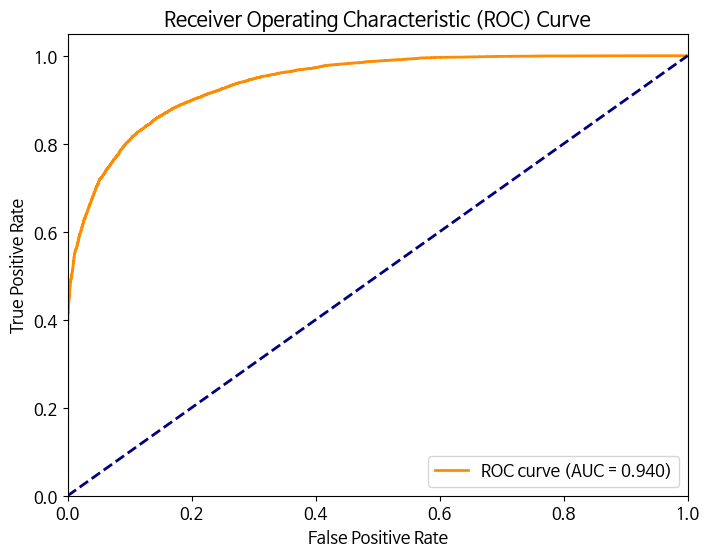

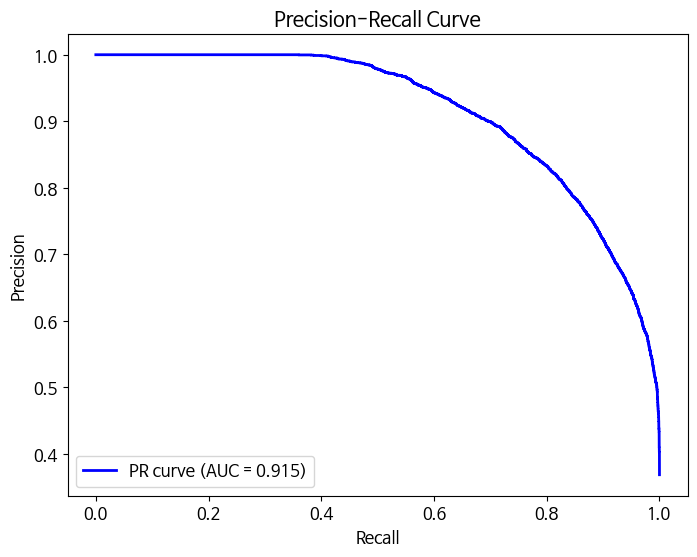

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# 성능이 가장 좋았던 모델

model = nn.Sequential(
    nn.Linear(input_size, 64),
    nn.LeakyReLU(),
    nn.BatchNorm1d(64),

    nn.Linear(64, 32),
    nn.LeakyReLU(),
    nn.BatchNorm1d(32),

    nn.Linear(32, 16),
    nn.LeakyReLU(),
    nn.BatchNorm1d(16),

    nn.Linear(16, 8),
    nn.LeakyReLU(),
    nn.BatchNorm1d(8),

    nn.Linear(8, 1),
    nn.Sigmoid(),
)

# 옵티마이저 설정
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 파라미터
n_epochs = 1000
batch_size = 64
print_interval = 10
early_stop = 100

# 학습 기록을 위한 변수들
lowest_loss = np.inf
best_model = None
lowest_epoch = np.inf
train_history, valid_history = [], []

# 학습 루프
for i in range(n_epochs):
    indices = torch.randperm(x[0].size(0))
    x_ = torch.index_select(x[0], dim=0, index=indices)
    y_ = torch.index_select(y[0], dim=0, index=indices)

    x_ = x_.split(batch_size, dim=0)
    y_ = y_.split(batch_size, dim=0)

    # 학습 모드
    model.train()
    train_loss = 0
    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += float(loss)

    train_loss = train_loss / len(x_)

    # 평가 모드
    model.eval()
    with torch.no_grad():
        x_ = x[1].split(batch_size, dim=0)
        y_ = y[1].split(batch_size, dim=0)

        valid_loss = 0

        for x_i, y_i in zip(x_, y_):
            y_hat_i = model(x_i)
            loss = F.binary_cross_entropy(y_hat_i, y_i)
            valid_loss += float(loss)

        valid_loss = valid_loss / len(x_)

    train_history += [train_loss]
    valid_history += [valid_loss]

    if (i + 1) % print_interval == 0:
        print('Epoch %d: train loss=%.4e valid_loss=%.4e lowest_loss=%.4e' % (
            i + 1,
            train_loss,
            valid_loss,
            lowest_loss,
        ))

    if valid_loss <= lowest_loss:
        lowest_loss = valid_loss
        lowest_epoch = i
        best_model = deepcopy(model.state_dict())
    else:
        if early_stop > 0 and lowest_epoch + early_stop < i + 1:
            print("There is no improvement during last %d epochs." % early_stop)
            break

print("The best validation loss from epoch %d: %.4e" % (lowest_epoch + 1, lowest_loss))
model.load_state_dict(best_model)

# 테스트 데이터로 평가
model.eval()
with torch.no_grad():
    x_ = x[2].split(batch_size, dim=0)
    y_ = y[2].split(batch_size, dim=0)

    test_loss = 0
    correct = 0
    total = 0

    for x_i, y_i in zip(x_, y_):
        y_hat_i = model(x_i)
        loss = F.binary_cross_entropy(y_hat_i, y_i)

        predicted = (y_hat_i > 0.5).float()
        total += y_i.size(0)
        correct += (predicted == y_i).sum().item()

        test_loss += float(loss)

    test_loss = test_loss / len(x_)
    accuracy = 100 * correct / total

print(f"Test loss: {test_loss:.4e}")
print(f"Test accuracy: {accuracy:.2f}%")


def detailed_analysis(model, x_test, y_test, batch_size=256):
    model.eval()
    all_preds = []
    all_probs = []
    all_true = []

    # 예측값 생성
    with torch.no_grad():
        for i in range(0, len(x_test), batch_size):
            batch_x = x_test[i:i+batch_size]
            batch_y = y_test[i:i+batch_size]

            outputs = model(batch_x)
            probs = outputs.numpy()
            preds = (outputs > 0.5).float().numpy()

            all_probs.extend(probs)
            all_preds.extend(preds)
            all_true.extend(batch_y.numpy())

    all_probs = np.array(all_probs)
    all_preds = np.array(all_preds)
    all_true = np.array(all_true)

    # 1. 혼동 행렬
    cm = confusion_matrix(all_true, all_preds)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # 2. 분류 보고서
    print("\nClassification Report:")
    print(classification_report(all_true, all_preds, target_names=['Not Canceled', 'Canceled']))

    # 3. ROC 곡선
    fpr, tpr, _ = roc_curve(all_true, all_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # 4. Precision-Recall 곡선
    precision, recall, _ = precision_recall_curve(all_true, all_probs)
    pr_auc = auc(recall, precision)

    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AUC = {pr_auc:.3f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# 분석 실행
results = detailed_analysis(model, x[2], y[2])

모델 저장

In [42]:
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_history': train_history,
    'valid_history': valid_history,
    'best_model': best_model,
}, 'hotel_cancellation_model.pth')